In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import statistics
from ast import literal_eval
from cycler import cycler
plt.style.use('ggplot')

## BASE MODEL ANALYSIS

In [244]:
#base model
df = pd.read_csv("Results_base_model_blue.csv")
df["Model Params"][0]

'[1000, [3, 4, 5], [2, 3, 4], 0.05, [1, 2, 3], 10, 0.1, 0.07142857142857142, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], True, 4, False, 0, 10, 0.1, 10, 1, 7, 0, True, 10, 0, 0, 0, 0]'

In [245]:
df = df.rename(columns={'Unnamed: 0': 'Index'})
df.head(2)

,Index,Infected,Recovered,Susceptible,Exposed,Quarantine_aa,Quarantine_market,Avg_livelihood,lockdown_status,people_at_market,...,moderate_lockdown,severe_lockdown,low_liv_counter,ok_liv_counter,avg_awareness,Model Params,Run,shelter_infs,market_infs,household_infs
0,0,0,5,975,25,0,0,1.000,0,0,...,0,0,13,120,0.0,"[1000, [3, 4, 5], [2, 3, 4], 0.05, [1, 2, 3], ...",1,0,0,15
1,1,0,1,965,35,0,0,1.176,0,381,...,0,0,2,148,0.0,"[1000, [3, 4, 5], [2, 3, 4], 0.05, [1, 2, 3], ...",1,0,1,24


In [246]:
#set all model parameters to be a list
for i in range(len(df)):
    df["Model Params"][i] = literal_eval(df["Model Params"][i])
#make new column with only the number of agents    
df.loc[:, 'num_agents'] = df["Model Params"].map(lambda x: x[0])
df.loc[:, 'max_contacts'] = df["Model Params"].map(lambda x: x[1])
df.loc[:, 'med_contacts'] = df["Model Params"].map(lambda x: x[2])
df.loc[:, 'cor_frac'] = df["Model Params"].map(lambda x: x[3])
df.loc[:, 'min_contacts'] = df["Model Params"].map(lambda x: x[4])
df.loc[:, 'growth_threshold'] = df["Model Params"].map(lambda x: x[5])
df.loc[:, 'ptrans'] = df["Model Params"].map(lambda x: x[6])
df.loc[:, 'precov'] = df["Model Params"].map(lambda x: x[7])
df.loc[:, 'shelter_pop'] = df["Model Params"].map(lambda x: x[8])
df.loc[:, 'hazard'] = df["Model Params"].map(lambda x: x[9])
df.loc[:, 'livelihood_threshold'] = df["Model Params"].map(lambda x: x[10])
df.loc[:, 'corona_threshold'] = df["Model Params"].map(lambda x: x[11])
df.loc[:, 'severity'] = df["Model Params"].map(lambda x: x[12])
df.loc[:, 'shelter_time'] = df["Model Params"].map(lambda x: x[13])
df.loc[:, 'shelter_frac'] = df["Model Params"].map(lambda x: x[14])
df.loc[:, 'E0'] = df["Model Params"].map(lambda x: x[15])
df.loc[:, 'test_frequency'] = df["Model Params"].map(lambda x: x[16])
df.loc[:, 'height_cash'] = df["Model Params"].map(lambda x: x[17])
df.loc[:, 'awareness_effect'] = df["Model Params"].map(lambda x: x[18])
df.loc[:, 'early_warning'] = df["Model Params"].map(lambda x: x[19])
df.loc[:, 'max_shelter_contacts'] = df["Model Params"].map(lambda x: x[20])
df.loc[:, 'lockdown_level'] = df["Model Params"].map(lambda x: x[21])
df.loc[:, 'market_inf'] = df["Model Params"].map(lambda x: x[22])
df.loc[:, 'household_inf'] = df["Model Params"].map(lambda x: x[23])
df.loc[:, 'shelter_inf'] = df["Model Params"].map(lambda x: x[24])


C:\Users\fuukv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [247]:
#set size to number of steps
size = 40
list_of_dfs = [df.loc[i:i+size-1,:] for i in range(0, len(df),size)]
#reset index for plotting
for df in list_of_dfs:
    df.reset_index(drop=True, inplace=True)
    


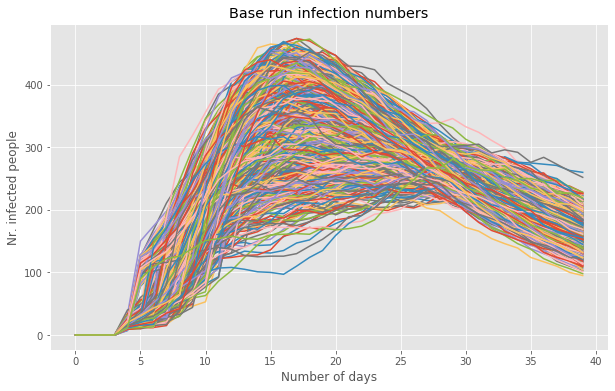

In [248]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)

labels = ["Base run"]

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Infected"], label = 'trial')
    
plt.ylabel("Nr. infected people")
plt.xlabel("Number of days")
plt.title("Base run infection numbers")
#plt.legend(labels)
plt.show()


In [249]:
tri = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Infected"])
    tri.append(x.T)
dfs = pd.concat(tri)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()

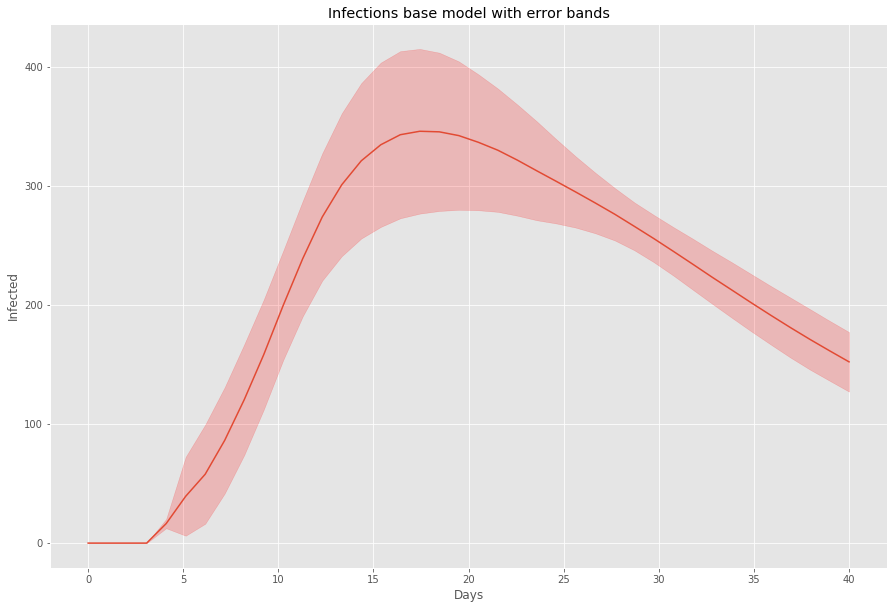

In [250]:
x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
error = dfs.loc["error"]

plt.plot(x, y, '-')
plt.fill_between(x, y-error, y+error, alpha = 0.2, color = "red")
plt.title("Infections base model with error bands")
plt.xlabel("Days")
plt.ylabel("Infected")
plt.show()

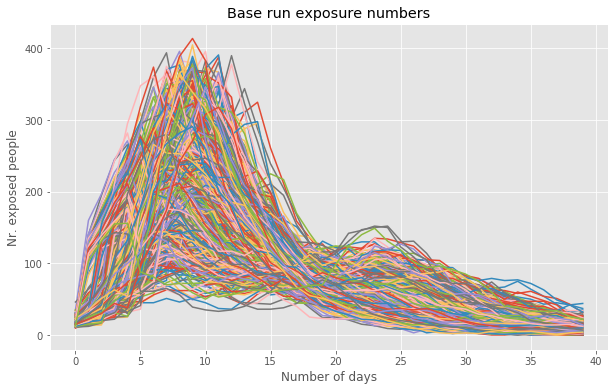

In [251]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)


labels = ["Base run"]

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Exposed"], label = 'trial')
    
plt.ylabel("Nr. exposed people")
plt.xlabel("Number of days")
plt.title("Base run exposure numbers")
#plt.legend(labels)
plt.show()


In [252]:
tri = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Exposed"])
    tri.append(x.T)
dfs = pd.concat(tri)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()

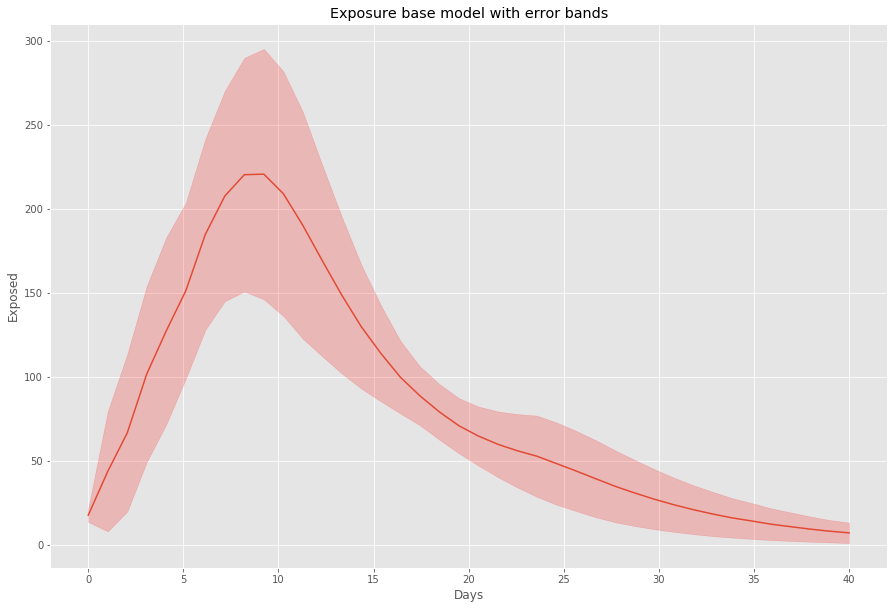

In [253]:
x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
error = dfs.loc["error"]

plt.plot(x, y, '-')
plt.fill_between(x, y-error, y+error, alpha = 0.2, color = "red")
plt.title("Exposure base model with error bands")
plt.xlabel("Days")
plt.ylabel("Exposed")
plt.show()

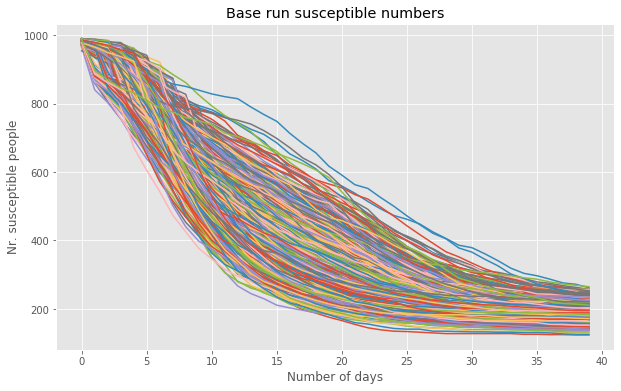

In [254]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)



labels = ["Base run"]

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Susceptible"], label = 'trial')
    
plt.ylabel("Nr. susceptible people")
plt.xlabel("Number of days")
plt.title("Base run susceptible numbers")
#plt.legend(labels)
plt.show()


In [103]:
tri = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Susceptible"])
    tri.append(x.T)
dfs = pd.concat(tri)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()

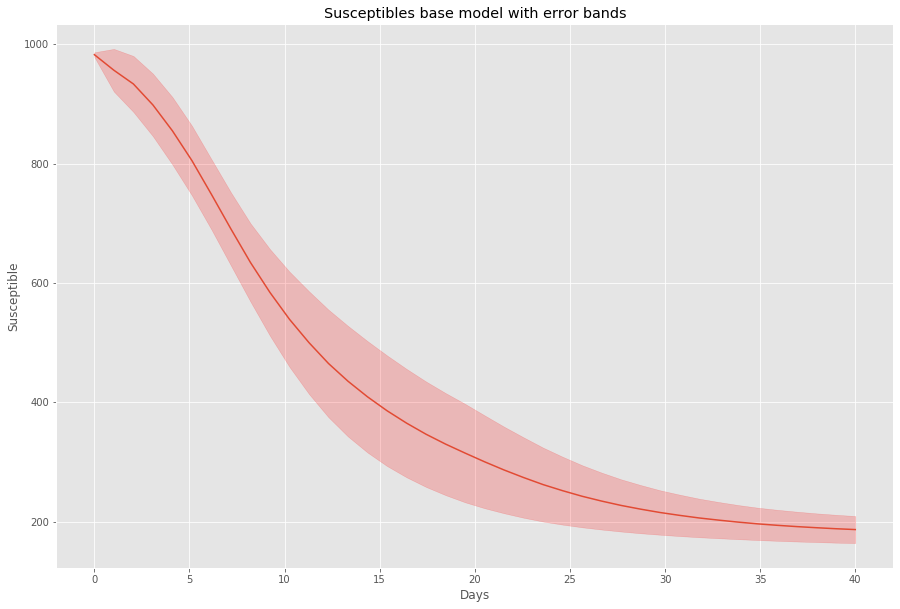

In [104]:
x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
error = dfs.loc["error"]

plt.plot(x, y, '-')
plt.fill_between(x, y-error, y+error, alpha = 0.2, color = "red")
plt.title("Susceptibles base model with error bands")
plt.xlabel("Days")
plt.ylabel("Susceptible")
plt.show()

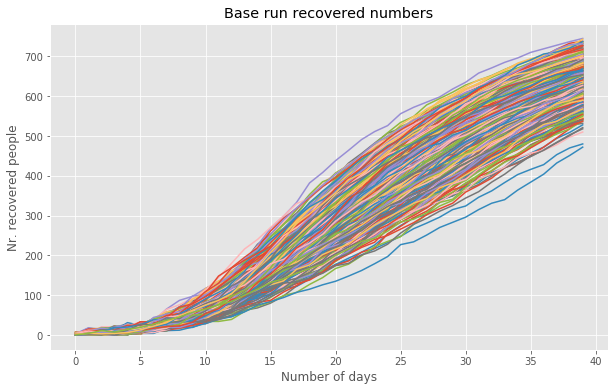

In [255]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)



labels = ["Base run"]

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Recovered"], label = 'trial')
    
plt.ylabel("Nr. recovered people")
plt.xlabel("Number of days")
plt.title("Base run recovered numbers")
#plt.legend(labels)
plt.show()


In [256]:
tri = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Recovered"])
    tri.append(x.T)
dfs = pd.concat(tri)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()

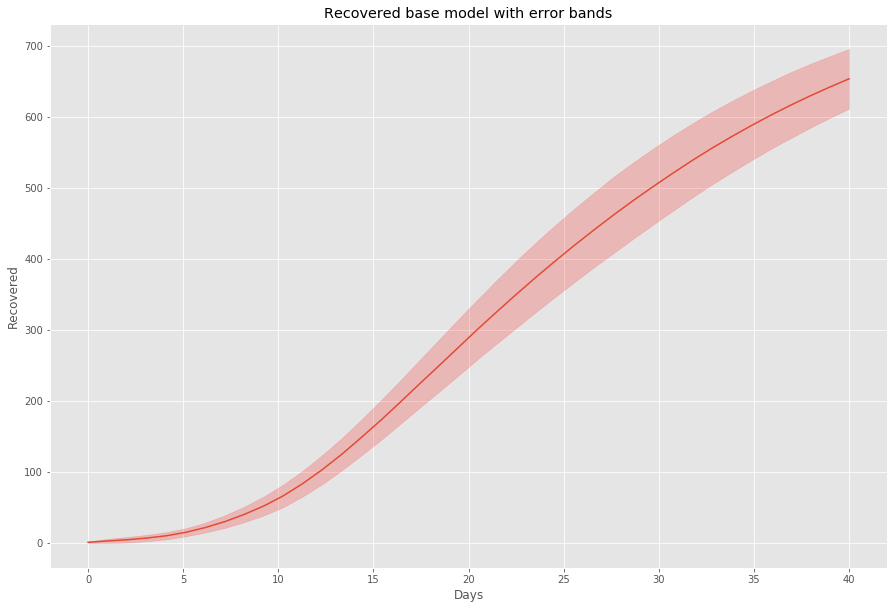

In [257]:
x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
error = dfs.loc["error"]

plt.plot(x, y, '-')
plt.fill_between(x, y-error, y+error, alpha = 0.2, color = "red")
plt.title("Recovered base model with error bands")
plt.xlabel("Days")
plt.ylabel("Recovered")
plt.show()

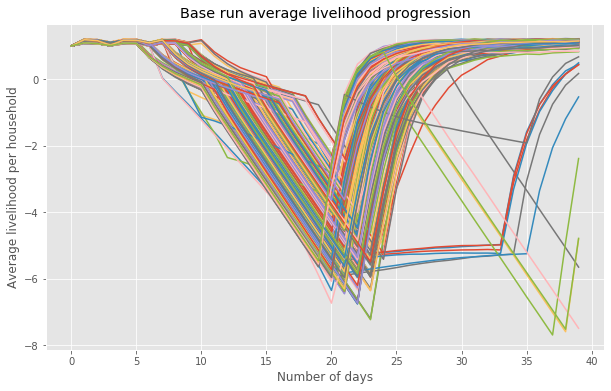

In [258]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)



labels = ["Base run"]

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Avg_livelihood"], label = 'trial')
    
plt.ylabel("Average livelihood per household")
plt.xlabel("Number of days")
plt.title("Base run average livelihood progression")
#plt.legend(labels)
plt.show()


In [109]:
tri = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Avg_livelihood"])
    tri.append(x.T)
dfs = pd.concat(tri)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()

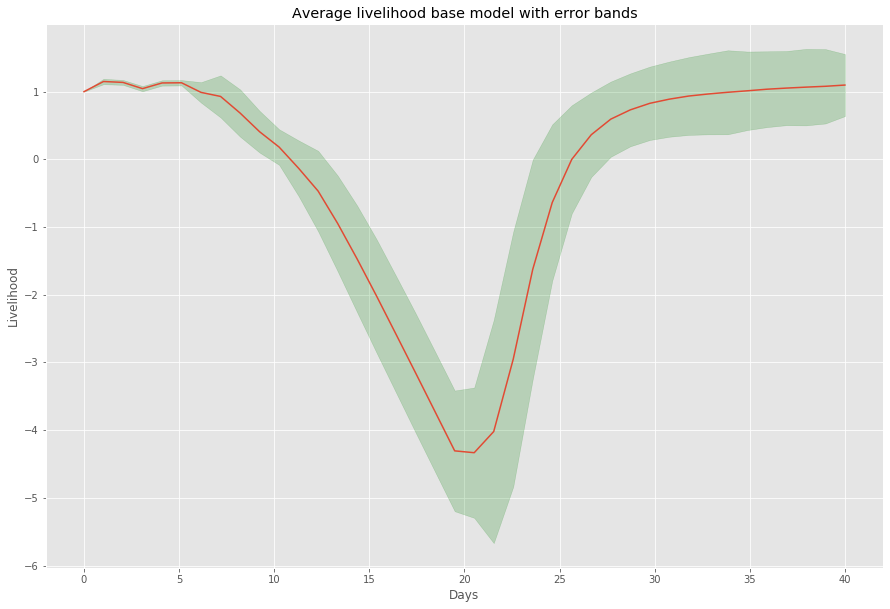

In [110]:
x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
error = dfs.loc["error"]

plt.plot(x, y, '-')
plt.fill_between(x, y-error, y+error, alpha = 0.2, color = "green")
plt.title("Average livelihood base model with error bands")
plt.xlabel("Days")
plt.ylabel("Livelihood")
plt.show()

In [114]:
new_df = []
new_fd = []
new_f = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["market_inf"])
    y = pd.DataFrame(list_of_dfs[i]["household_inf"])
    z = pd.DataFrame(list_of_dfs[i]["shelter_inf"])
    new_df.append(x.T)
    new_fd.append(y.T)
    new_f.append(z.T)
dfs = pd.concat(new_df)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()
fds =  pd.concat(new_fd)
fds.loc['mean'] = fds.mean()
fds.loc["error"] = fds.std()
fs =  pd.concat(new_f)
fs.loc['mean'] = fs.mean()
fs.loc["error"] = fs.std()

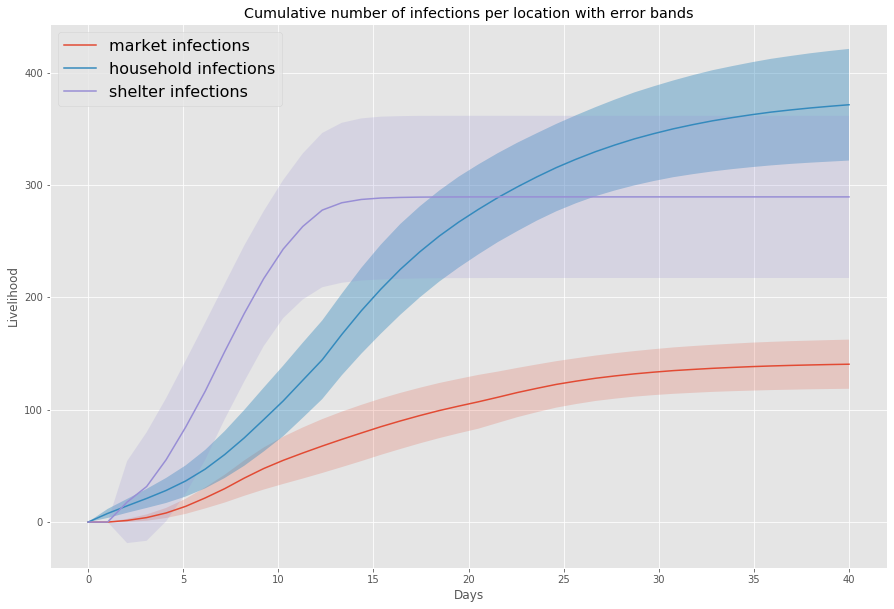

In [115]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]
k = fs.loc["mean"]
errorf = fs.loc["error"]

labels = ["market infections", "household infections", "shelter infections"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2)
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.4)
plt.plot(x, k, '-')
plt.fill_between(x, k-errorf, k+errorf, alpha = 0.2)
plt.title("Cumulative number of infections per location with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Livelihood")
plt.show()

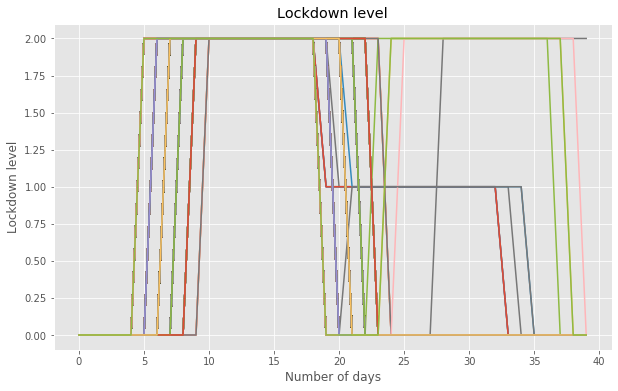

In [259]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)



labels = ["Base run"]

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["lockdown_level"], label = 'trial')
    
plt.ylabel("Lockdown level")
plt.xlabel("Number of days")
plt.title("Lockdown level")
#plt.legend(labels)
plt.show()

## EFFECT LOCKDOWN LEVELS

In [197]:
#lockdown levels
df = pd.read_csv("Results_base_model_ll0_sev1_newest.csv")
fd = pd.read_csv("Results_base_model_ll1_sev1_newest.csv")
f = pd.read_csv("Results_base_model_ll2_sev1_newest.csv")

df["Model Params"][0]

'[1000, [3, 3, 4], [2, 3, 4], 0.05, [1, 2, 3], 10, 0.1, 0.07142857142857142, [0], True, 4, False, 0, 10, 1, 10, 1, 7, 0, True, 100, 0, 0, 0, 0]'

In [177]:
f.head()

,Unnamed: 0,Infected,Recovered,Susceptible,Exposed,Quarantine_aa,Quarantine_market,Avg_livelihood,lockdown_status,people_at_market,...,moderate_lockdown,severe_lockdown,low_liv_counter,ok_liv_counter,avg_awareness,Model Params,Run,shelter_infs,market_infs,household_infs
0,0,0,1,983,17,0,0,1.0000,2,0,...,0,1,11,129,0.0,"[1000, [6, 5, 6], [3, 2, 4], 0.05, [1, 2, 1], ...",1,0,0,7
1,1,0,5,953,47,0,0,0.2830,2,160,...,0,2,131,17,0.0,"[1000, [6, 5, 6], [3, 2, 4], 0.05, [1, 2, 1], ...",1,20,0,17
2,2,0,2,944,56,0,0,-0.3165,2,160,...,0,3,138,12,0.0,"[1000, [6, 5, 6], [3, 2, 4], 0.05, [1, 2, 1], ...",1,20,0,26
3,3,0,4,936,64,0,0,-0.8545,2,160,...,0,4,139,11,0.0,"[1000, [6, 5, 6], [3, 2, 4], 0.05, [1, 2, 1], ...",1,22,0,32
4,4,17,3,933,50,0,0,-1.4000,2,160,...,0,5,139,10,0.0,"[1000, [6, 5, 6], [3, 2, 4], 0.05, [1, 2, 1], ...",1,22,0,35


In [198]:
df = df.rename(columns={'Unnamed: 0': 'Index'})
fd = fd.rename(columns={'Unnamed: 0': 'Index'})
f = f.rename(columns={'Unnamed: 0': 'Index'})

In [199]:
#set all model parameters to be a list
for i in range(len(df)): #takes forever
    df["Model Params"][i] = literal_eval(df["Model Params"][i])
#make new column with only the number of agents    
df.loc[:, 'num_agents'] = df["Model Params"].map(lambda x: x[0])
df.loc[:, 'max_contacts'] = df["Model Params"].map(lambda x: x[1])
df.loc[:, 'med_contacts'] = df["Model Params"].map(lambda x: x[2])
df.loc[:, 'cor_frac'] = df["Model Params"].map(lambda x: x[3])
df.loc[:, 'min_contacts'] = df["Model Params"].map(lambda x: x[4])
df.loc[:, 'growth_threshold'] = df["Model Params"].map(lambda x: x[5])
df.loc[:, 'ptrans'] = df["Model Params"].map(lambda x: x[6])
df.loc[:, 'precov'] = df["Model Params"].map(lambda x: x[7])
df.loc[:, 'shelter_pop'] = df["Model Params"].map(lambda x: x[8])
df.loc[:, 'hazard'] = df["Model Params"].map(lambda x: x[9])
df.loc[:, 'livelihood_threshold'] = df["Model Params"].map(lambda x: x[10])
df.loc[:, 'corona_threshold'] = df["Model Params"].map(lambda x: x[11])
df.loc[:, 'severity'] = df["Model Params"].map(lambda x: x[12])
df.loc[:, 'shelter_time'] = df["Model Params"].map(lambda x: x[13])
df.loc[:, 'shelter_frac'] = df["Model Params"].map(lambda x: x[14])
df.loc[:, 'E0'] = df["Model Params"].map(lambda x: x[15])
df.loc[:, 'test_frequency'] = df["Model Params"].map(lambda x: x[16])
df.loc[:, 'height_cash'] = df["Model Params"].map(lambda x: x[17])
df.loc[:, 'awareness_effect'] = df["Model Params"].map(lambda x: x[18])
df.loc[:, 'early_warning'] = df["Model Params"].map(lambda x: x[19])
df.loc[:, 'max_shelter_contacts'] = df["Model Params"].map(lambda x: x[20])
df.loc[:, 'lockdown_level'] = df["Model Params"].map(lambda x: x[21])
df.loc[:, 'market_inf'] = df["Model Params"].map(lambda x: x[22])
df.loc[:, 'household_inf'] = df["Model Params"].map(lambda x: x[23])
df.loc[:, 'shelter_inf'] = df["Model Params"].map(lambda x: x[24])


C:\Users\fuukv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [200]:
#set all model parameters to be a list
for i in range(len(fd)): #takes forever
    fd["Model Params"][i] = literal_eval(fd["Model Params"][i])
#make new column with only the number of agents    
fd.loc[:, 'num_agents'] = fd["Model Params"].map(lambda x: x[0])
fd.loc[:, 'max_contacts'] = fd["Model Params"].map(lambda x: x[1])
fd.loc[:, 'med_contacts'] = fd["Model Params"].map(lambda x: x[2])
fd.loc[:, 'cor_frac'] = fd["Model Params"].map(lambda x: x[3])
fd.loc[:, 'min_contacts'] = fd["Model Params"].map(lambda x: x[4])
fd.loc[:, 'growth_threshold'] = fd["Model Params"].map(lambda x: x[5])
fd.loc[:, 'ptrans'] = fd["Model Params"].map(lambda x: x[6])
fd.loc[:, 'precov'] = fd["Model Params"].map(lambda x: x[7])
fd.loc[:, 'shelter_pop'] = fd["Model Params"].map(lambda x: x[8])
fd.loc[:, 'hazard'] = fd["Model Params"].map(lambda x: x[9])
fd.loc[:, 'livelihood_threshold'] = fd["Model Params"].map(lambda x: x[10])
fd.loc[:, 'corona_threshold'] = fd["Model Params"].map(lambda x: x[11])
fd.loc[:, 'severity'] = fd["Model Params"].map(lambda x: x[12])
fd.loc[:, 'shelter_time'] = fd["Model Params"].map(lambda x: x[13])
fd.loc[:, 'shelter_frac'] = fd["Model Params"].map(lambda x: x[14])
fd.loc[:, 'E0'] = fd["Model Params"].map(lambda x: x[15])
fd.loc[:, 'test_frequency'] = df["Model Params"].map(lambda x: x[16])
fd.loc[:, 'height_cash'] = fd["Model Params"].map(lambda x: x[17])
fd.loc[:, 'awareness_effect'] = fd["Model Params"].map(lambda x: x[18])
fd.loc[:, 'early_warning'] = fd["Model Params"].map(lambda x: x[19])
fd.loc[:, 'max_shelter_contacts'] = fd["Model Params"].map(lambda x: x[20])
fd.loc[:, 'lockdown_level'] = fd["Model Params"].map(lambda x: x[21])
fd.loc[:, 'market_inf'] = fd["Model Params"].map(lambda x: x[22])
fd.loc[:, 'household_inf'] = fd["Model Params"].map(lambda x: x[23])
fd.loc[:, 'shelter_inf'] = fd["Model Params"].map(lambda x: x[24])


C:\Users\fuukv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [201]:
#set all model parameters to be a list
for i in range(len(f)): #takes forever
    f["Model Params"][i] = literal_eval(f["Model Params"][i])
#make new column with only the number of agents    
f.loc[:, 'num_agents'] = f["Model Params"].map(lambda x: x[0])
f.loc[:, 'max_contacts'] = f["Model Params"].map(lambda x: x[1])
f.loc[:, 'med_contacts'] = f["Model Params"].map(lambda x: x[2])
f.loc[:, 'cor_frac'] = f["Model Params"].map(lambda x: x[3])
f.loc[:, 'min_contacts'] = f["Model Params"].map(lambda x: x[4])
f.loc[:, 'growth_threshold'] = f["Model Params"].map(lambda x: x[5])
f.loc[:, 'ptrans'] = f["Model Params"].map(lambda x: x[6])
f.loc[:, 'precov'] = f["Model Params"].map(lambda x: x[7])
f.loc[:, 'shelter_pop'] = f["Model Params"].map(lambda x: x[8])
f.loc[:, 'hazard'] = f["Model Params"].map(lambda x: x[9])
f.loc[:, 'livelihood_threshold'] = f["Model Params"].map(lambda x: x[10])
f.loc[:, 'corona_threshold'] = f["Model Params"].map(lambda x: x[11])
f.loc[:, 'severity'] = f["Model Params"].map(lambda x: x[12])
f.loc[:, 'shelter_time'] = f["Model Params"].map(lambda x: x[13])
f.loc[:, 'shelter_frac'] = f["Model Params"].map(lambda x: x[14])
f.loc[:, 'E0'] = f["Model Params"].map(lambda x: x[15])
f.loc[:, 'test_frequency'] = f["Model Params"].map(lambda x: x[16])
f.loc[:, 'height_cash'] = f["Model Params"].map(lambda x: x[17])
f.loc[:, 'awareness_effect'] = f["Model Params"].map(lambda x: x[18])
f.loc[:, 'early_warning'] = f["Model Params"].map(lambda x: x[19])
f.loc[:, 'max_shelter_contacts'] = f["Model Params"].map(lambda x: x[20])
f.loc[:, 'lockdown_level'] = f["Model Params"].map(lambda x: x[21])
f.loc[:, 'market_inf'] = f["Model Params"].map(lambda x: x[22])
f.loc[:, 'household_inf'] = f["Model Params"].map(lambda x: x[23])
f.loc[:, 'shelter_inf'] = f["Model Params"].map(lambda x: x[24])


C:\Users\fuukv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
#set size to number of steps
size = 40
list_of_dfs = [df.loc[i:i+size-1,:] for i in range(0, len(df),size)]
#reset index for plotting
for df in list_of_dfs:
    df.reset_index(drop=True, inplace=True)
    


In [203]:
#set size to number of steps
size = 40
list_of_fds = [fd.loc[i:i+size-1,:] for i in range(0, len(fd),size)]
#reset index for plotting
for fd in list_of_fds:
    fd.reset_index(drop=True, inplace=True)

In [204]:
#set size to number of steps
size = 40
list_of_fs = [f.loc[i:i+size-1,:] for i in range(0, len(f),size)]
#reset index for plotting
for f in list_of_fs:
    f.reset_index(drop=True, inplace=True)

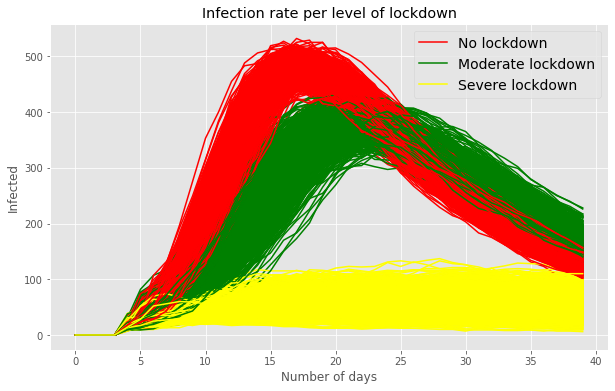

In [185]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)

#set all runs to the same color
colors = ["b" for i in range(len(df))]# for i in range(len(df))]

labels = ["No lockdown", "Moderate lockdown", "Severe lockdown"]
#except for the run that you want to inspect
colors[7] = "r"
ax1.set_prop_cycle(cycler('color', colors))

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Infected"], label = 'trial', color = 'red')
    ax1.plot(list_of_fds[i]["Infected"], label = "on", color = 'green')
    ax1.plot(list_of_fs[i]["Infected"], color = 'yellow', label = "half compliant")
    
plt.ylabel("Infected")
plt.xlabel("Number of days")
plt.title("Infection rate per level of lockdown")
plt.legend(labels,  prop={'size': 14})
plt.show()


In [186]:
new_df = []
new_fd = []
new_f = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Infected"])
    y = pd.DataFrame(list_of_fds[i]["Infected"])
    z = pd.DataFrame(list_of_fs[i]["Infected"])
    new_df.append(x.T)
    new_fd.append(y.T)
    new_f.append(z.T)
dfs = pd.concat(new_df)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()
fds =  pd.concat(new_fd)
fds.loc['mean'] = fds.mean()
fds.loc["error"] = fds.std()
fs =  pd.concat(new_f)
fs.loc['mean'] = fs.mean()
fs.loc["error"] = fs.std()

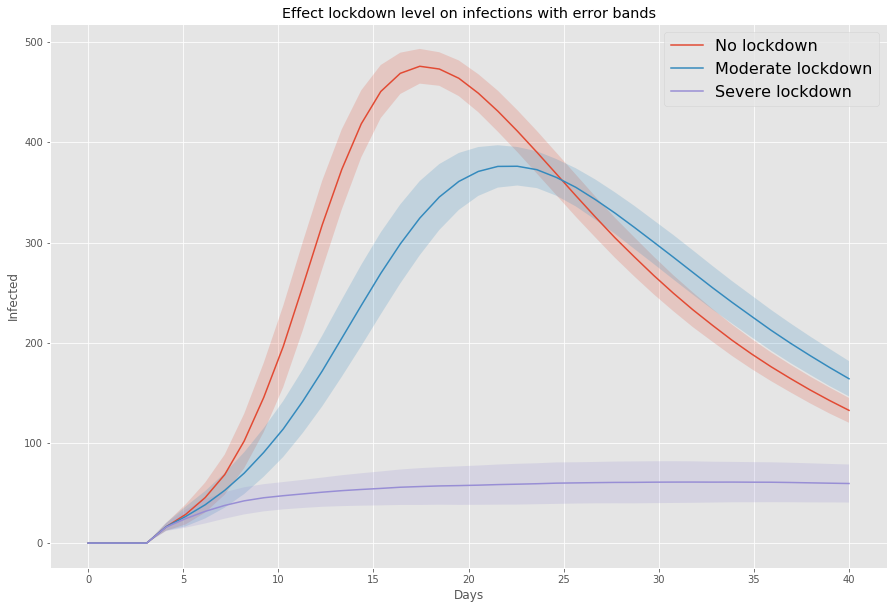

In [188]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]
k = fs.loc["mean"]
errorf = fs.loc["error"]

labels = ["No lockdown", "Moderate lockdown", "Severe lockdown"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2)
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.2)
plt.plot(x, k, '-')
plt.fill_between(x, k-errorf, k+errorf, alpha = 0.2)
plt.title("Effect lockdown level on infections with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Infected")
plt.show()

In [164]:
new_df = []
new_fd = []
new_f = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Exposed"])
    y = pd.DataFrame(list_of_fds[i]["Exposed"])
    z = pd.DataFrame(list_of_fs[i]["Exposed"])
    new_df.append(x.T)
    new_fd.append(y.T)
    new_f.append(z.T)
dfs = pd.concat(new_df)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()
fds =  pd.concat(new_fd)
fds.loc['mean'] = fds.mean()
fds.loc["error"] = fds.std()
fs =  pd.concat(new_f)
fs.loc['mean'] = fs.mean()
fs.loc["error"] = fs.std()

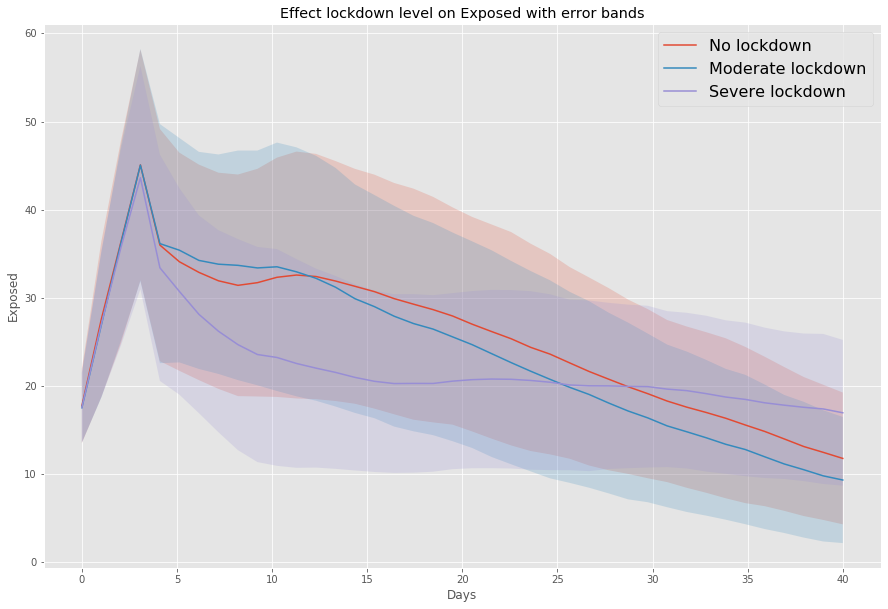

In [165]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]
k = fs.loc["mean"]
errorf = fs.loc["error"]

labels = ["No lockdown", "Moderate lockdown", "Severe lockdown"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2)
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.2)
plt.plot(x, k, '-')
plt.fill_between(x, k-errorf, k+errorf, alpha = 0.2)
plt.title("Effect lockdown level on Exposed with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Exposed")
plt.show()

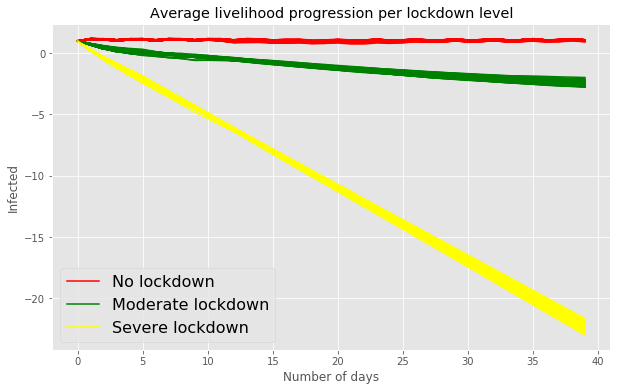

In [131]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)

#set all runs to the same color
colors = ["b" for i in range(len(df))]# for i in range(len(df))]

labels = ["No lockdown", "Moderate lockdown", "Severe lockdown"]
#except for the run that you want to inspect
colors[7] = "r"
ax1.set_prop_cycle(cycler('color', colors))

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Avg_livelihood"], label = 'trial', color = 'red')
    ax1.plot(list_of_fds[i]["Avg_livelihood"], label = "on", color = 'green')
    ax1.plot(list_of_fs[i]["Avg_livelihood"], color = 'yellow', label = "half compliant")
    
plt.ylabel("Infected")
plt.xlabel("Number of days")
plt.title("Average livelihood progression per lockdown level")
plt.legend(labels, prop={'size': 16})
plt.show()


In [132]:
new_df = []
new_fd = []
new_f = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Avg_livelihood"])
    y = pd.DataFrame(list_of_fds[i]["Avg_livelihood"])
    z = pd.DataFrame(list_of_fs[i]["Avg_livelihood"])
    new_df.append(x.T)
    new_fd.append(y.T)
    new_f.append(z.T)
dfs = pd.concat(new_df)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()
fds =  pd.concat(new_fd)
fds.loc['mean'] = fds.mean()
fds.loc["error"] = fds.std()
fs =  pd.concat(new_f)
fs.loc['mean'] = fs.mean()
fs.loc["error"] = fs.std()

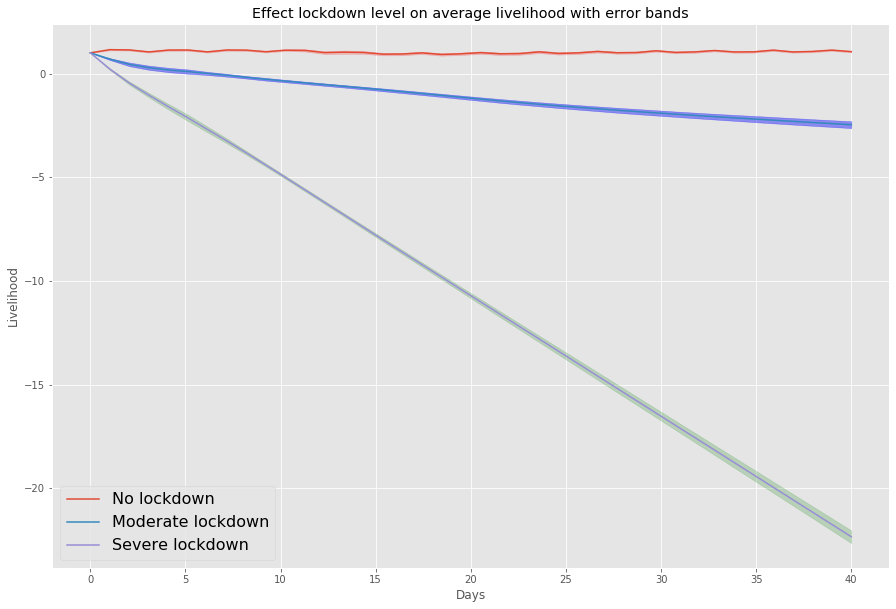

In [133]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]
k = fs.loc["mean"]
errorf = fs.loc["error"]

labels = ["No lockdown", "Moderate lockdown", "Severe lockdown"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2, color = "red")
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.4, color = "blue")
plt.plot(x, k, '-')
plt.fill_between(x, k-errorf, k+errorf, alpha = 0.2, color = "green")
plt.title("Effect lockdown level on average livelihood with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Livelihood")
plt.show()

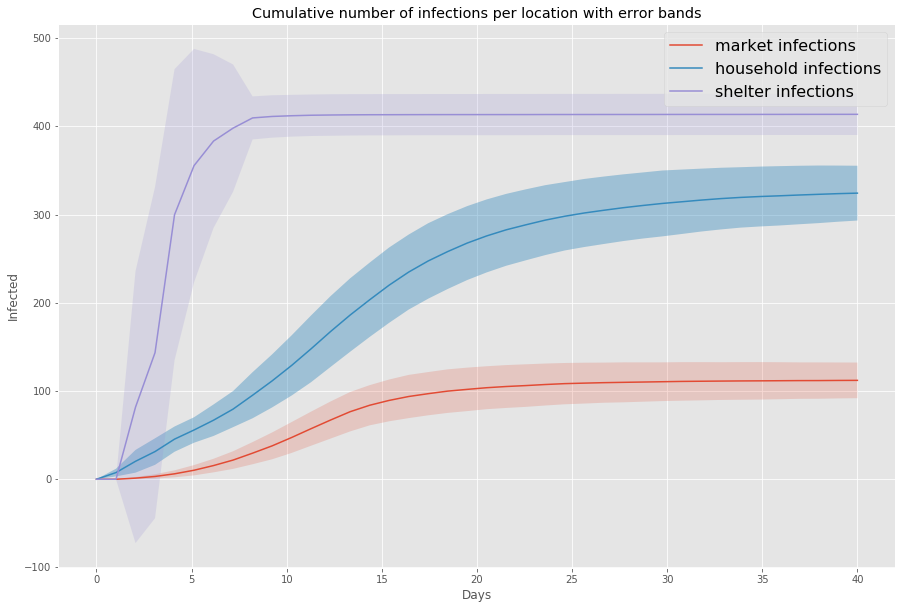

In [206]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]
k = fs.loc["mean"]
errorf = fs.loc["error"]

labels = ["market infections", "household infections", "shelter infections"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2)
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.4)
plt.plot(x, k, '-')
plt.fill_between(x, k-errorf, k+errorf, alpha = 0.2)
plt.title("Cumulative number of infections per location with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Infected")
plt.show()

In [207]:
new_df = []
new_fd = []
new_f = []
for i in range(len(list_of_fds)):
    x = pd.DataFrame(list_of_fds[i]["market_inf"])
    y = pd.DataFrame(list_of_fds[i]["household_inf"])
    z = pd.DataFrame(list_of_fds[i]["shelter_inf"])
    new_df.append(x.T)
    new_fd.append(y.T)
    new_f.append(z.T)
dfs = pd.concat(new_df)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()
fds =  pd.concat(new_fd)
fds.loc['mean'] = fds.mean()
fds.loc["error"] = fds.std()
fs =  pd.concat(new_f)
fs.loc['mean'] = fs.mean()
fs.loc["error"] = fs.std()

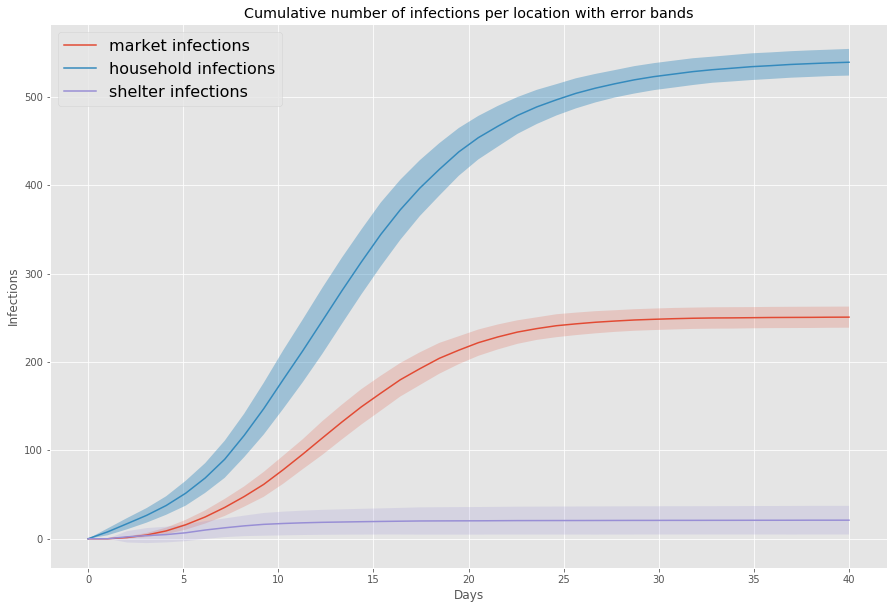

In [208]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]
k = fs.loc["mean"]
errorf = fs.loc["error"]

labels = ["market infections", "household infections", "shelter infections"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2)
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.4)
plt.plot(x, k, '-')
plt.fill_between(x, k-errorf, k+errorf, alpha = 0.2)
plt.title("Cumulative number of infections per location with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Infections")
plt.show()

In [209]:
new_df = []
new_fd = []
new_f = []
for i in range(len(list_of_fs)):
    x = pd.DataFrame(list_of_fs[i]["market_inf"])
    y = pd.DataFrame(list_of_fs[i]["household_inf"])
    z = pd.DataFrame(list_of_fs[i]["shelter_inf"])
    new_df.append(x.T)
    new_fd.append(y.T)
    new_f.append(z.T)
dfs = pd.concat(new_df)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()
fds =  pd.concat(new_fd)
fds.loc['mean'] = fds.mean()
fds.loc["error"] = fds.std()
fs =  pd.concat(new_f)
fs.loc['mean'] = fs.mean()
fs.loc["error"] = fs.std()

In [210]:
f.head()

,Index,Infected,Recovered,Susceptible,Exposed,Quarantine_aa,Quarantine_market,Avg_livelihood,lockdown_status,people_at_market,...,E0,test_frequency,height_cash,awareness_effect,early_warning,max_shelter_contacts,lockdown_level,market_inf,household_inf,shelter_inf
0,360,0,2,987,13,0,0,1.0000,2,0,...,10,1,7,0,True,100,2,0,0,0
1,361,0,2,980,20,0,0,0.1945,2,160,...,10,1,7,0,True,100,2,0,3,0
2,362,0,2,968,32,0,0,-0.5020,2,160,...,10,1,7,0,True,100,2,0,10,0
3,363,0,2,959,41,0,0,-1.1275,2,160,...,10,1,7,0,True,100,2,0,22,0
4,364,11,4,950,37,0,0,-1.7440,2,160,...,10,1,7,0,True,100,2,1,30,0


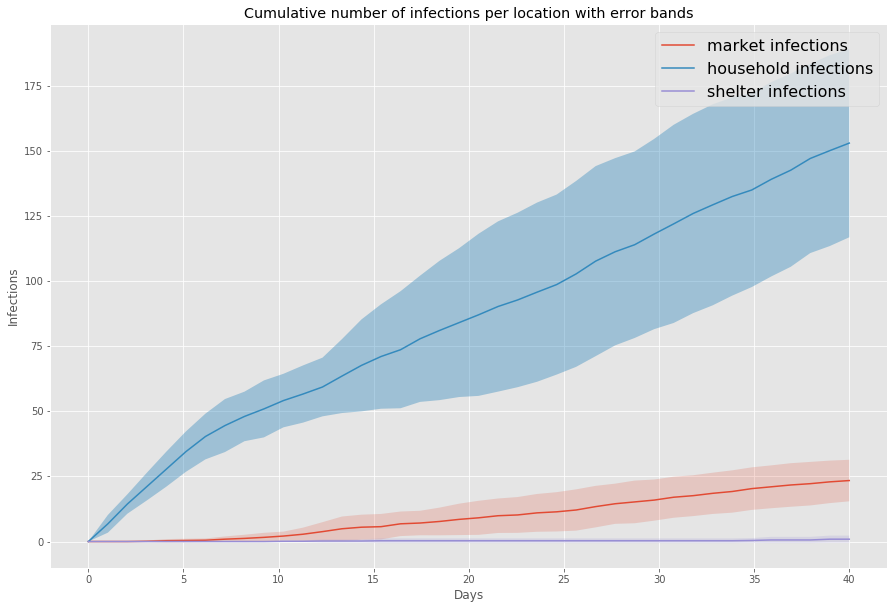

In [211]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]
k = fs.loc["mean"]
errorf = fs.loc["error"]

labels = ["market infections", "household infections", "shelter infections"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2)
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.4)
plt.plot(x, k, '-')
plt.fill_between(x, k-errorf, k+errorf, alpha = 0.2)
plt.title("Cumulative number of infections per location with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Infections")
plt.show()

## EFFECT DISASTER COMPONENT

In [88]:
#base model with and without hazard
# df = pd.read_csv("Results_base_model_no_hazard.csv")
# fd = pd.read_csv("Results_base_model_fixed_hazard.csv")

#base model with and without hazard
df = pd.read_csv("Results_base_model_no_haz_new.csv")
fd = pd.read_csv("Results_base_model_fixed_haz_new.csv")

df["Model Params"][0]

'[1000, [3, 4, 5], [2, 3, 4], 0.05, [1, 2, 3], 10, 0.1, 0.07142857142857142, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], False, 4, False, 0, 10, 0.1, 10, 1, 7, 0, True, 10, 0, 0, 0, 0]'

In [371]:
#set all model parameters to be a list
for i in range(len(df)): #takes forever
    df["Model Params"][i] = literal_eval(df["Model Params"][i])
#make new column with only the number of agents    
df.loc[:, 'num_agents'] = df["Model Params"].map(lambda x: x[0])
df.loc[:, 'max_contacts'] = df["Model Params"].map(lambda x: x[1])
df.loc[:, 'med_contacts'] = df["Model Params"].map(lambda x: x[2])
df.loc[:, 'cor_frac'] = df["Model Params"].map(lambda x: x[3])
df.loc[:, 'min_contacts'] = df["Model Params"].map(lambda x: x[4])
df.loc[:, 'growth_threshold'] = df["Model Params"].map(lambda x: x[5])
df.loc[:, 'ptrans'] = df["Model Params"].map(lambda x: x[6])
df.loc[:, 'precov'] = df["Model Params"].map(lambda x: x[7])
df.loc[:, 'shelter_pop'] = df["Model Params"].map(lambda x: x[8])
df.loc[:, 'hazard'] = df["Model Params"].map(lambda x: x[9])
df.loc[:, 'livelihood_threshold'] = df["Model Params"].map(lambda x: x[10])
df.loc[:, 'corona_threshold'] = df["Model Params"].map(lambda x: x[11])
df.loc[:, 'severity'] = df["Model Params"].map(lambda x: x[12])
df.loc[:, 'shelter_time'] = df["Model Params"].map(lambda x: x[13])
df.loc[:, 'shelter_frac'] = df["Model Params"].map(lambda x: x[14])
df.loc[:, 'E0'] = df["Model Params"].map(lambda x: x[15])
df.loc[:, 'test_frequency'] = df["Model Params"].map(lambda x: x[16])
df.loc[:, 'height_cash'] = df["Model Params"].map(lambda x: x[17])
df.loc[:, 'awareness_effect'] = df["Model Params"].map(lambda x: x[18])
df.loc[:, 'early_warning'] = df["Model Params"].map(lambda x: x[19])
df.loc[:, 'max_shelter_contacts'] = df["Model Params"].map(lambda x: x[20])
df.loc[:, 'lockdown_level'] = df["Model Params"].map(lambda x: x[21])
# df.loc[:, 'market_inf'] = df["Model Params"].map(lambda x: x[22])
# df.loc[:, 'household_inf'] = df["Model Params"].map(lambda x: x[23])
# df.loc[:, 'shelter_inf'] = df["Model Params"].map(lambda x: x[24])


C:\Users\fuukv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [372]:
#set all model parameters to be a list
for i in range(len(fd)): #takes forever
    fd["Model Params"][i] = literal_eval(fd["Model Params"][i])
#make new column with only the number of agents    
fd.loc[:, 'num_agents'] = fd["Model Params"].map(lambda x: x[0])
fd.loc[:, 'max_contacts'] = fd["Model Params"].map(lambda x: x[1])
fd.loc[:, 'med_contacts'] = fd["Model Params"].map(lambda x: x[2])
fd.loc[:, 'cor_frac'] = fd["Model Params"].map(lambda x: x[3])
fd.loc[:, 'min_contacts'] = fd["Model Params"].map(lambda x: x[4])
fd.loc[:, 'growth_threshold'] = fd["Model Params"].map(lambda x: x[5])
fd.loc[:, 'ptrans'] = fd["Model Params"].map(lambda x: x[6])
fd.loc[:, 'precov'] = fd["Model Params"].map(lambda x: x[7])
fd.loc[:, 'shelter_pop'] = fd["Model Params"].map(lambda x: x[8])
fd.loc[:, 'hazard'] = fd["Model Params"].map(lambda x: x[9])
fd.loc[:, 'livelihood_threshold'] = fd["Model Params"].map(lambda x: x[10])
fd.loc[:, 'corona_threshold'] = fd["Model Params"].map(lambda x: x[11])
fd.loc[:, 'severity'] = fd["Model Params"].map(lambda x: x[12])
fd.loc[:, 'shelter_time'] = fd["Model Params"].map(lambda x: x[13])
fd.loc[:, 'shelter_frac'] = fd["Model Params"].map(lambda x: x[14])
fd.loc[:, 'E0'] = fd["Model Params"].map(lambda x: x[15])
fd.loc[:, 'test_frequency'] = df["Model Params"].map(lambda x: x[16])
fd.loc[:, 'height_cash'] = fd["Model Params"].map(lambda x: x[17])
fd.loc[:, 'awareness_effect'] = fd["Model Params"].map(lambda x: x[18])
fd.loc[:, 'early_warning'] = fd["Model Params"].map(lambda x: x[19])
fd.loc[:, 'max_shelter_contacts'] = fd["Model Params"].map(lambda x: x[20])
fd.loc[:, 'lockdown_level'] = fd["Model Params"].map(lambda x: x[21])
# fd.loc[:, 'market_inf'] = df["Model Params"].map(lambda x: x[22])
# fd.loc[:, 'household_inf'] = df["Model Params"].map(lambda x: x[23])
# fd.loc[:, 'shelter_inf'] = df["Model Params"].map(lambda x: x[24])


C:\Users\fuukv\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [373]:
#set size to number of steps
size = 40
list_of_dfs = [df.loc[i:i+size-1,:] for i in range(0, len(df),size)]
#reset index for plotting
for df in list_of_dfs:
    df.reset_index(drop=True, inplace=True)

In [374]:
#set size to number of steps
size = 40
list_of_fds = [fd.loc[i:i+size-1,:] for i in range(0, len(fd),size)]
#reset index for plotting
for fd in list_of_fds:
    fd.reset_index(drop=True, inplace=True)

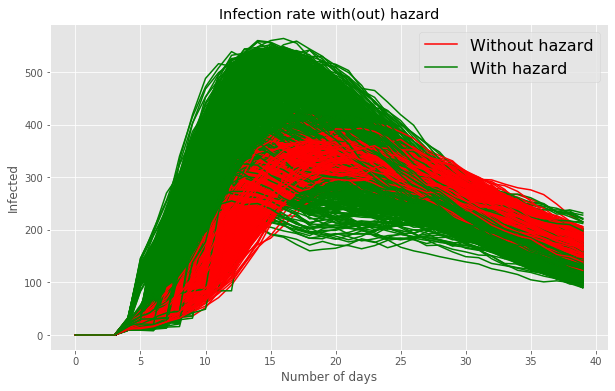

In [375]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)

#set all runs to the same color
colors = ["b" for i in range(len(df))]# for i in range(len(df))]

labels = ["Without hazard", "With hazard"]
#except for the run that you want to inspect
colors[7] = "r"
ax1.set_prop_cycle(cycler('color', colors))

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Infected"], label = 'trial', color = 'red')
    ax1.plot(list_of_fds[i]["Infected"], label = "on", color = 'green')
    
plt.ylabel("Infected")
plt.xlabel("Number of days")
plt.title("Infection rate with(out) hazard")
plt.legend(labels, prop={'size': 16})
plt.show()


In [376]:
new_df = []
new_fd = []
new_f = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Infected"])
    y = pd.DataFrame(list_of_fds[i]["Infected"])
    new_df.append(x.T)
    new_fd.append(y.T)
dfs = pd.concat(new_df)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()
fds =  pd.concat(new_fd)
fds.loc['mean'] = fds.mean()
fds.loc["error"] = fds.std()

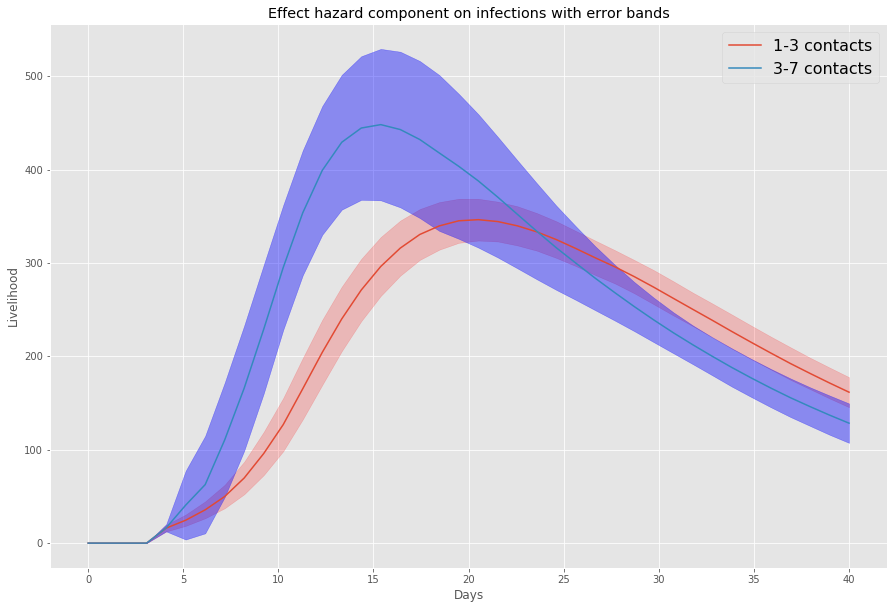

In [377]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]

labels = ["1-3 contacts", "3-7 contacts"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2, color = "red")
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.4, color = "blue")
plt.title("Effect hazard component on infections with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Livelihood")
plt.show()

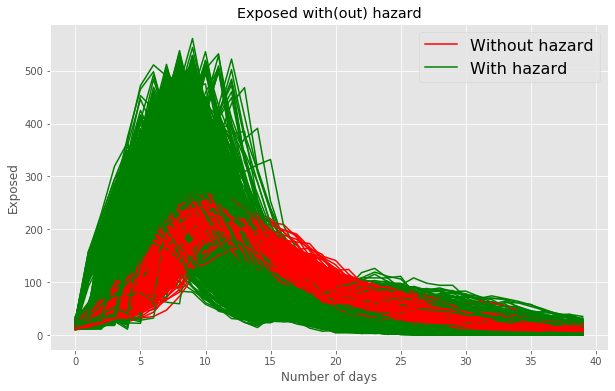

In [378]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)

#set all runs to the same color
colors = ["b" for i in range(len(df))]# for i in range(len(df))]

labels = ["Without hazard", "With hazard"]
#except for the run that you want to inspect
colors[7] = "r"
ax1.set_prop_cycle(cycler('color', colors))

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Exposed"], label = 'trial', color = 'red')
    ax1.plot(list_of_fds[i]["Exposed"], label = "on", color = 'green')
    
plt.ylabel("Exposed")
plt.xlabel("Number of days")
plt.title("Exposed with(out) hazard")
plt.legend(labels, prop={'size': 16})
plt.show()


In [379]:
new_df = []
new_fd = []
new_f = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Exposed"])
    y = pd.DataFrame(list_of_fds[i]["Exposed"])
    new_df.append(x.T)
    new_fd.append(y.T)
dfs = pd.concat(new_df)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()
fds =  pd.concat(new_fd)
fds.loc['mean'] = fds.mean()
fds.loc["error"] = fds.std()

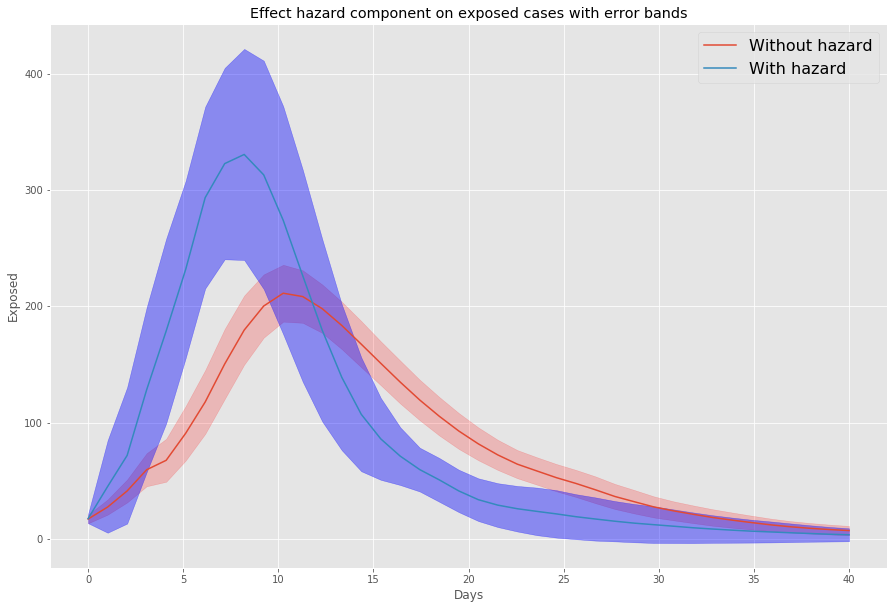

In [380]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]

labels = ["Without hazard", "With hazard"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2, color = "red")
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.4, color = "blue")
plt.title("Effect hazard component on exposed cases with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Exposed")
plt.show()

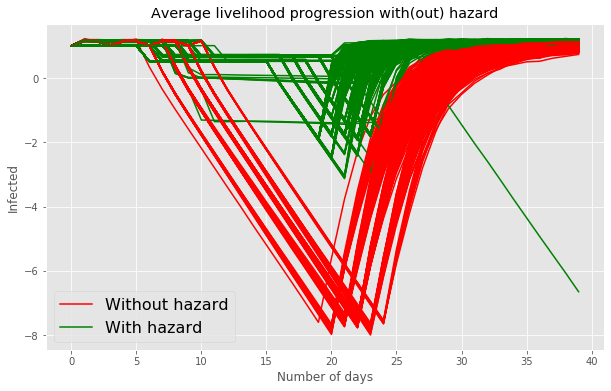

In [381]:
fig1 = plt.figure(figsize=(10,6))
ax1 = fig1.add_subplot(111)

#set all runs to the same color
colors = ["b" for i in range(len(df))]# for i in range(len(df))]


labels = ["Without hazard", "With hazard"]
#except for the run that you want to inspect
colors[7] = "r"
ax1.set_prop_cycle(cycler('color', colors))

for i in range(len(list_of_dfs)):
    ax1.plot(list_of_dfs[i]["Avg_livelihood"], label = 'trial', color = 'red')
    ax1.plot(list_of_fds[i]["Avg_livelihood"], label = "on", color = 'green')
    
    
plt.ylabel("Infected")
plt.xlabel("Number of days")
plt.title("Average livelihood progression with(out) hazard")
plt.legend(labels, prop={'size': 16})
plt.show()

In [382]:
new_df = []
new_fd = []
new_f = []
for i in range(len(list_of_dfs)):
    x = pd.DataFrame(list_of_dfs[i]["Avg_livelihood"])
    y = pd.DataFrame(list_of_fds[i]["Avg_livelihood"])
    new_df.append(x.T)
    new_fd.append(y.T)
dfs = pd.concat(new_df)
dfs.loc['mean'] = dfs.mean()
dfs.loc["error"] = dfs.std()
fds =  pd.concat(new_fd)
fds.loc['mean'] = fds.mean()
fds.loc["error"] = fds.std()

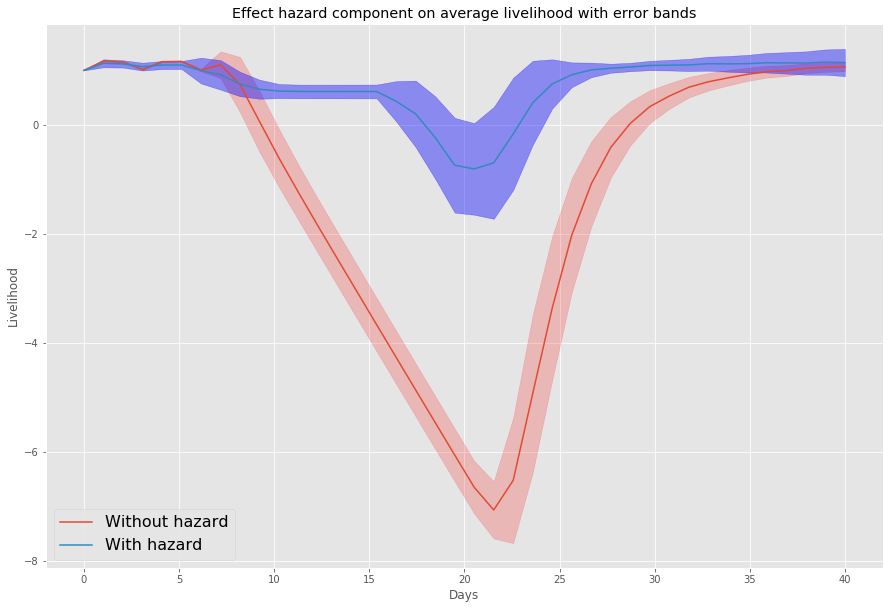

In [70]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

x = np.linspace(0, 40, 40)
y = dfs.loc["mean"]
errordf = dfs.loc["error"]
z = fds.loc["mean"]
errorfd = fds.loc["error"]

labels = ["Without hazard", "With hazard"]

plt.plot(x, y, '-')
plt.fill_between(x, y-errordf, y+errordf, alpha = 0.2, color = "red")
plt.plot(x, z, '-')
plt.fill_between(x, z-errorfd, z+errorfd, alpha = 0.4, color = "blue")
plt.title("Effect hazard component on average livelihood with error bands")
plt.legend(labels, prop={'size': 16})
plt.xlabel("Days")
plt.ylabel("Livelihood")
plt.show()